<font color=green size=7>               AHMET KURT </font>                DATA SCIENTIST

<font color=blue size=7> Mine Safety and Health Administration </font>                 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
from google.colab import files
uploaded=files.upload()

Saving Accidents.xlsx to Accidents.xlsx


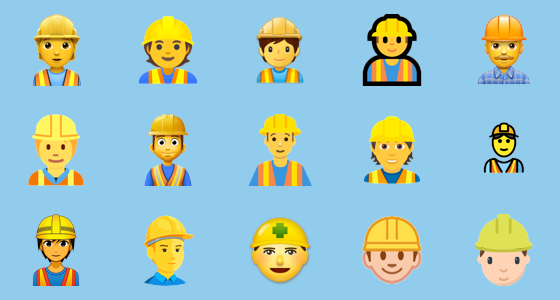





# **IMPORT LIBRARIES**

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime


import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
pd.set_option('display.max_columns',100)

#CLUSTERING
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

#REGRESSION
from sklearn.linear_model import LinearRegression 
lr = LinearRegression()
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score 

from sklearn.linear_model import Ridge, Lasso
R = Ridge()
L= Lasso()
from sklearn.linear_model import ElasticNet
E = ElasticNet(l1_ratio=.9)
from sklearn.tree import ExtraTreeRegressor
ETR = ExtraTreeRegressor()
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor()
from sklearn.neighbors import KNeighborsRegressor
est = KNeighborsRegressor()

#DEEP LEARNING
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

#NLP
from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer
%matplotlib inline

import re
import nltk

from nltk import word_tokenize, pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.tokenize import TreebankWordTokenizer
tokenizer=TreebankWordTokenizer()
from PIL import Image
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import warnings

In [ ]:
def regression(x,y):
        from sklearn.linear_model import LinearRegression
        from sklearn.linear_model import Ridge,Lasso
        from sklearn.linear_model import ElasticNet
        from sklearn.neighbors import KNeighborsRegressor
        from sklearn.ensemble import GradientBoostingRegressor
        from sklearn.tree import ExtraTreeRegressor
        from sklearn.tree import DecisionTreeRegressor
        from xgboost import XGBRegressor
        from sklearn.model_selection import train_test_split
        from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
        
        L=LinearRegression()
        R=Ridge()
        Lass=Lasso()
        E=ElasticNet()
        ETR=ExtraTreeRegressor()
        GBR=GradientBoostingRegressor()
        kn=KNeighborsRegressor()
        dt=DecisionTreeRegressor()
        xgb=XGBRegressor()
       
        
        algos=[L,R,Lass,E,ETR,GBR,kn,dt,xgb]
        algo_names=['Linear','Ridge','Lasso','ElasticNet','Extra Tree','Gradient Boosting','KNeighborsRegressor','Decision Tree','XGBRegressor']
        
        x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.2,random_state=42)
        
        r_squared= []
        rmse= []
        mae= []
        
        result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
        
        
        for algo in algos:
            p=algo.fit(x_train,y_train).predict(x_test)
            r_squared.append(r2_score(y_test,p))
            rmse.append(mean_squared_error(y_test,p)**.5)
            mae.append(mean_absolute_error(y_test,p))

        result.R_Squared=r_squared
        result.RMSE=rmse
        result.MAE=mae
        
        rtable=result.sort_values('R_Squared',ascending=False)
        return rtable

# **READ THE DATA**

In [7]:
df=pd.read_excel('Accidents.xlsx')

## ***EXPLORATORY DATA ANALYSIS***


# **C VE M DİYE AYIR,İKİ VERİYE , DOSYAYA BÖL**

---



In [8]:
df_coal=df[df.COAL_METAL_IND=='C']

In [9]:
df_metal=df[df.COAL_METAL_IND=='M']

In [10]:
df_coal.to_excel('acc_in_coals.xlsx', index=False)

In [11]:
df_metal.to_excel('acc_in_metal.xlsx', index=False)

In [12]:
df_coal.head()

,MINE_ID,CONTROLLER_ID,CONTROLLER_NAME,OPERATOR_ID,OPERATOR_NAME,CONTRACTOR_ID,DOCUMENT_NO,SUBUNIT_CD,SUBUNIT,ACCIDENT_DT,CAL_YR,CAL_QTR,FISCAL_YR,FISCAL_QTR,ACCIDENT_TIME,DEGREE_INJURY_CD,DEGREE_INJURY,FIPS_STATE_CD,UG_LOCATION_CD,UG_LOCATION,UG_MINING_METHOD_CD,UG_MINING_METHOD,MINING_EQUIP_CD,MINING_EQUIP,EQUIP_MFR_CD,EQUIP_MFR_NAME,EQUIP_MODEL_NO,SHIFT_BEGIN_TIME,CLASSIFICATION_CD,CLASSIFICATION,ACCIDENT_TYPE_CD,ACCIDENT_TYPE,NO_INJURIES,TOT_EXPER,MINE_EXPER,JOB_EXPER,OCCUPATION_CD,OCCUPATION,ACTIVITY_CD,ACTIVITY,INJURY_SOURCE_CD,INJURY_SOURCE,NATURE_INJURY_CD,NATURE_INJURY,INJ_BODY_PART_CD,INJ_BODY_PART,SCHEDULE_CHARGE,DAYS_RESTRICT,DAYS_LOST,TRANS_TERM,RETURN_TO_WORK_DT,IMMED_NOTIFY_CD,IMMED_NOTIFY,INVEST_BEGIN_DT,NARRATIVE,CLOSED_DOC_NO,COAL_METAL_IND
20,100347,C00992,Walter Energy Incorporated,P22745,Taft Coal Sales & Associates Incorporated,NaN,220130660034,3,"STRIP, QUARY, OPEN PIT",02/28/2013,2013,1,2013,2,1230.0,03,DAYS AWAY FROM WORK ONLY,1,?,NO VALUE FOUND,?,NO VALUE FOUND,24,"Front-end loader, Tractor-shovel, Payloader, H...",121,Not Reported,NaN,500.0,12,POWERED HAULAGE,02,Struck against a moving object,1,10.33,10.33,10.33,382,"Front-end loader, Scraper-loader operator, Pan...",053,Front-end loader,076,SURFACE MINING MACHINES,160,"CONTUSN,BRUISE,INTAC SKIN",420,BACK (MUSCLES/SPINE/S-CORD/TAILBONE),0.0,0.0,5.0,N,03/11/2013,?,NO VALUE FOUND,NaN,"While operating a loader, loose material dislo...",3.201307e+11,C
21,100347,C00992,Walter Energy Incorporated,P22745,Taft Coal Sales & Associates Incorporated,NaN,220142580027,30,MILL OPERATION/PREPARATION PLANT,09/08/2014,2014,3,2014,4,1330.0,06,"NO DYS AWY FRM WRK,NO RSTR ACT",1,?,NO VALUE FOUND,?,NO VALUE FOUND,?,NO VALUE FOUND,?,NO VALUE FOUND,NaN,530.0,09,HANDLING OF MATERIALS,38,"Absorption of radiations, caustics, toxic and ...",1,8.77,8.77,3.69,304,"Maintenance man, Mechanic, Repair/Serviceman,...",028,Handling supplies or material,024,"CHEMICALS,CHEM COMP,NEC",130,"BURN,CHEMICL-FUME,COMPOUN",130,EYE(S) OPTIC NERVE/VISON,0.0,0.0,0.0,N,09/09/2014,?,NO VALUE FOUND,NaN,EE was moving a caustic line when the line fel...,NaN,C
27,100759,C00877,Chevron Corporation,P01032,Chevron Mining Inc,NaN,220041660144,1,UNDERGROUND,06/10/2004,2004,2,2004,3,1404.0,00,ACCIDENT ONLY,1,01,VERTICAL SHAFT,?,NO VALUE FOUND,19,"Elevator, Skip, Cage, Buckets, Mancage, Slope ...",119,Not on this list,NaN,1400.0,13,HOISTING,44,"Accident type, without injuries",0,NaN,NaN,NaN,?,NO VALUE FOUND,?,NO VALUE FOUND,?,NO VALUE FOUND,?,NO VALUE FOUND,?,NO VALUE FOUND,0.0,0.0,0.0,NaN,NaN,11,HOISTING,06/10/2004,The tyro creek service elevator was out of ser...,NaN,C
28,100759,C00877,Chevron Corporation,P01032,Chevron Mining Inc,NaN,220041960040,1,UNDERGROUND,07/10/2004,2004,3,2004,4,130.0,00,ACCIDENT ONLY,1,04,INTERSECTION,05,Continuous Mining,?,NO VALUE FOUND,?,NO VALUE FOUND,NaN,2200.0,07,FALL OF ROOF OR BACK,44,"Accident type, without injuries",0,NaN,NaN,NaN,?,NO VALUE FOUND,?,NO VALUE FOUND,?,NO VALUE FOUND,?,NO VALUE FOUND,?,NO VALUE FOUND,0.0,0.0,0.0,NaN,NaN,08,ROOF FALL,07/10/2004,A ROOF FALL OCCURRED IN OUR WEST MAIN SECTION ...,NaN,C
29,100759,C00877,Chevron Corporation,P01032,Chevron Mining Inc,NaN,220052730044,1,UNDERGROUND,09/19/2005,2005,3,2005,4,2125.0,03,DAYS AWAY FROM WORK ONLY,1,04,INTERSECTION,05,Continuous Mining,13,"Conveyor, Belt feeder, Stage loader, Hopper sh...",102,Stamler,BF-17B-8-74C,1400.0,03,EXPLODING VESSELS UNDER PRESSURE,33,Contact with hot objects or substances,3,21.31,1.06,1.06,102,"Electrician, Lineman",039,Machine maintenance,045,"FLAME,FIRE,SMOKE,NEC",120,BURN OR SCALD (HEAT),700,MULTIPLE PARTS (MORE THAN ONE MAJOR),0.0,0.0,187.0,N,05/01/2006,?,NO VALUE FOUND,09/20/2005,AN OXYGEN CYLINDER TRAVELED THRU THE PICK BREA...,NaN,C


In [13]:
df_coal.shape

(120327, 57)

In [14]:
df_metal.head()

,MINE_ID,CONTROLLER_ID,CONTROLLER_NAME,OPERATOR_ID,OPERATOR_NAME,CONTRACTOR_ID,DOCUMENT_NO,SUBUNIT_CD,SUBUNIT,ACCIDENT_DT,CAL_YR,CAL_QTR,FISCAL_YR,FISCAL_QTR,ACCIDENT_TIME,DEGREE_INJURY_CD,DEGREE_INJURY,FIPS_STATE_CD,UG_LOCATION_CD,UG_LOCATION,UG_MINING_METHOD_CD,UG_MINING_METHOD,MINING_EQUIP_CD,MINING_EQUIP,EQUIP_MFR_CD,EQUIP_MFR_NAME,EQUIP_MODEL_NO,SHIFT_BEGIN_TIME,CLASSIFICATION_CD,CLASSIFICATION,ACCIDENT_TYPE_CD,ACCIDENT_TYPE,NO_INJURIES,TOT_EXPER,MINE_EXPER,JOB_EXPER,OCCUPATION_CD,OCCUPATION,ACTIVITY_CD,ACTIVITY,INJURY_SOURCE_CD,INJURY_SOURCE,NATURE_INJURY_CD,NATURE_INJURY,INJ_BODY_PART_CD,INJ_BODY_PART,SCHEDULE_CHARGE,DAYS_RESTRICT,DAYS_LOST,TRANS_TERM,RETURN_TO_WORK_DT,IMMED_NOTIFY_CD,IMMED_NOTIFY,INVEST_BEGIN_DT,NARRATIVE,CLOSED_DOC_NO,COAL_METAL_IND
0,100003,0041044,Lhoist Group,L13586,"Lhoist North America of Alabama, LLC",MPH,220132310045,3,"STRIP, QUARY, OPEN PIT",08/12/2013,2013,3,2013,4,1815.0,05,DAYS RESTRICTED ACTIVITY ONLY,1,?,NO VALUE FOUND,?,NO VALUE FOUND,67,"Trucks, Service truck, Utility truck, Pickup, ...",020,Chevrolet,C7H042,700.0,18,SLIP OR FALL OF PERSON,12,Fall from machine,1,1.00,1.00,1.00,304,"Maintenance man, Mechanic, Repair/Serviceman,...",039,Machine maintenance,117,GROUND,330,"SPRAIN,STRAIN RUPT DISC",420,BACK (MUSCLES/SPINE/S-CORD/TAILBONE),0.0,2.0,0.0,N,08/19/2013,?,NO VALUE FOUND,NaN,Employee says he slipped off back of fuel truc...,NaN,M
1,100009,M00024,Legacy Vulcan Corp (Form:Vulcan Materials Co),L16168,"Vulcan Construction Materials, LLC",NaN,220053250019,3,"STRIP, QUARY, OPEN PIT",11/13/2005,2005,4,2006,1,900.0,05,DAYS RESTRICTED ACTIVITY ONLY,1,?,NO VALUE FOUND,?,NO VALUE FOUND,13,"Conveyor, Belt feeder, Stage loader, Hopper sh...",121,Not Reported,NaN,600.0,09,HANDLING OF MATERIALS,24,"Caught in, under or between NEC",1,35.00,35.00,35.00,304,"Maintenance man, Mechanic, Repair/Serviceman,...",028,Handling supplies or material,038,"CONVEYORS,NEC",220,"FRACTURE,CHIP",340,FINGER(S)/THUMB,0.0,13.0,0.0,N,12/01/2005,?,NO VALUE FOUND,NaN,2 employees were attempting to load troughing ...,3.200534e+11,M
2,100011,M11763,Imerys S A,L17074,Imerys Pigments LLC,NaN,220062000052,30,MILL OPERATION/PREPARATION PLANT,07/14/2006,2006,3,2006,4,800.0,06,"NO DYS AWY FRM WRK,NO RSTR ACT",1,?,NO VALUE FOUND,?,NO VALUE FOUND,28,Hand tools (not powered),121,Not Reported,NaN,700.0,10,HANDTOOLS (NONPOWERED),18,Fall onto or against objects,1,20.23,20.23,6.38,374,"Warehouseman, Bagger, Palletizer/Stacker, Stor...",030,Hand tools (not powered),088,"METAL,NEC(PIPE,WIRE,NAIL)",180,"CUT,LACER,PUNCT-OPN WOUND",141,JAW INCLUDE CHIN,0.0,0.0,0.0,N,07/15/2006,?,NO VALUE FOUND,NaN,Employee was pushing against pry bar. Bar slip...,NaN,M
3,100011,M11763,Imerys S A,0090005,Imerys Carbonates LLC,NaN,220090120006,30,MILL OPERATION/PREPARATION PLANT,01/08/2009,2009,1,2009,2,1600.0,06,"NO DYS AWY FRM WRK,NO RSTR ACT",1,?,NO VALUE FOUND,?,NO VALUE FOUND,?,NO VALUE FOUND,?,NO VALUE FOUND,NaN,700.0,18,SLIP OR FALL OF PERSON,17,Fall to the walkway or working surface,1,23.69,23.69,23.69,304,"Maintenance man, Mechanic, Repair/Serviceman,...",039,Machine maintenance,117,GROUND,180,"CUT,LACER,PUNCT-OPN WOUND",512,KNEE/PATELLA,0.0,0.0,0.0,N,01/09/2009,?,NO VALUE FOUND,NaN,Employee tripped on c-channel at #6 silo. Fel...,NaN,M
4,100011,M11763,Imerys S A,0090005,Imerys Carbonates LLC,NaN,220101060015,30,MILL OPERATION/PREPARATION PLANT,01/14/2010,2010,1,2010,2,540.0,03,DAYS AWAY FROM WORK ONLY,1,?,NO VALUE FOUND,?,NO VALUE FOUND,?,NO VALUE FOUND,?,NO VALUE FOUND,NaN,530.0,18,SLIP OR FALL OF PERSON,17,Fall to the walkway or working surface,1,36.85,36.85,0.31,374,"Warehouseman, Bagger, Palletizer/Stacker, Stor...",092,"Walking, Running",117,GROUND,330,"SPRAIN,STRAIN RUPT DISC",450,SHOULDERS (COLLARBONE/CLAVICLE/SCAPULA),0.0,0.0,366.0,N,05/01/2011,?,NO VALUE FOUND,NaN,Ground was icy. Employee slipped on ice and f...,NaN,M


In [15]:
df_metal.shape

(132227, 57)

In [16]:
ls

Accidents.xlsx  acc_in_coals.xlsx  acc_in_metal.xlsx  drive/  sample_data/


***COAL***

In [17]:
df_coal['INVEST_BEGIN_DT'].value_counts()

09/24/2001    24
11/04/2003    23
03/05/2008    22
09/17/2001    21
10/18/2004    21
              ..
05/16/2021     1
07/05/2009     1
05/05/2016     1
05/12/2013     1
06/06/2022     1
Name: INVEST_BEGIN_DT, Length: 7001, dtype: int64

In [18]:
df_coal['INVEST_BEGIN_DT']=pd.to_datetime(df_coal['INVEST_BEGIN_DT'])

df_coal['INVEST_BEGIN_DT_Year']=df_coal['INVEST_BEGIN_DT'].dt.year
df_coal['INVEST_BEGIN_DT_Month']=df_coal['INVEST_BEGIN_DT'].dt.month
df_coal['INVEST_BEGIN_DT_Weekday']=df_coal['INVEST_BEGIN_DT'].dt.dayofweek
df_coal['INVEST_BEGIN_DT_Month_Name']=df_coal['INVEST_BEGIN_DT'].dt.month_name()
df_coal['INVEST_BEGIN_DT_Weekday_Name']=df_coal['INVEST_BEGIN_DT'].dt.day_name()

df=df_coal.drop('INVEST_BEGIN_DT',axis=1)

In [19]:
df_coal['INVEST_BEGIN_DT_Year'].value_counts()

2005.0    2866
2004.0    2475
2000.0    2428
2001.0    2389
2002.0    2365
2006.0    2320
2007.0    2291
2003.0    2214
2008.0    1993
2009.0    1775
2010.0    1652
2011.0    1630
2012.0    1116
2014.0     858
2013.0     817
2015.0     640
2016.0     474
2019.0     468
2017.0     452
2018.0     430
2022.0     316
2020.0     316
2021.0     292
Name: INVEST_BEGIN_DT_Year, dtype: int64

In which year did the most reviews begin?



<Axes: title={'center': 'In which year did the most reviews begin??'}, xlabel='INVEST_BEGIN_DT_Year', ylabel='Density'>

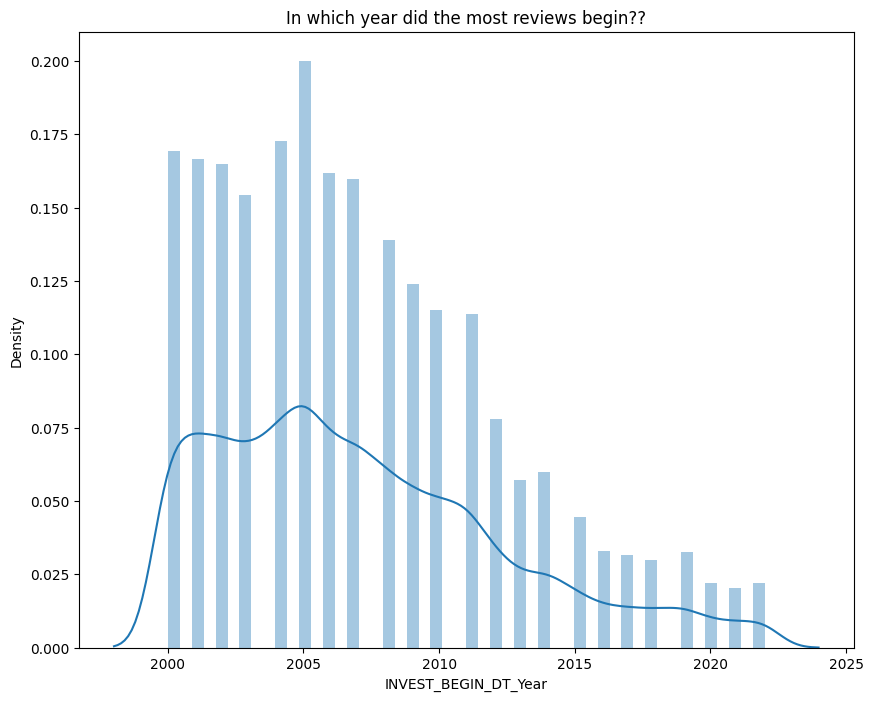

In [20]:
plt.figure(figsize=(10,8))
plt.title('In which year did the most reviews begin??')
sns.distplot(df_coal.INVEST_BEGIN_DT_Year)

<Axes: title={'center': 'In which month did the most reviews begin??'}, xlabel='INVEST_BEGIN_DT_Month', ylabel='Density'>

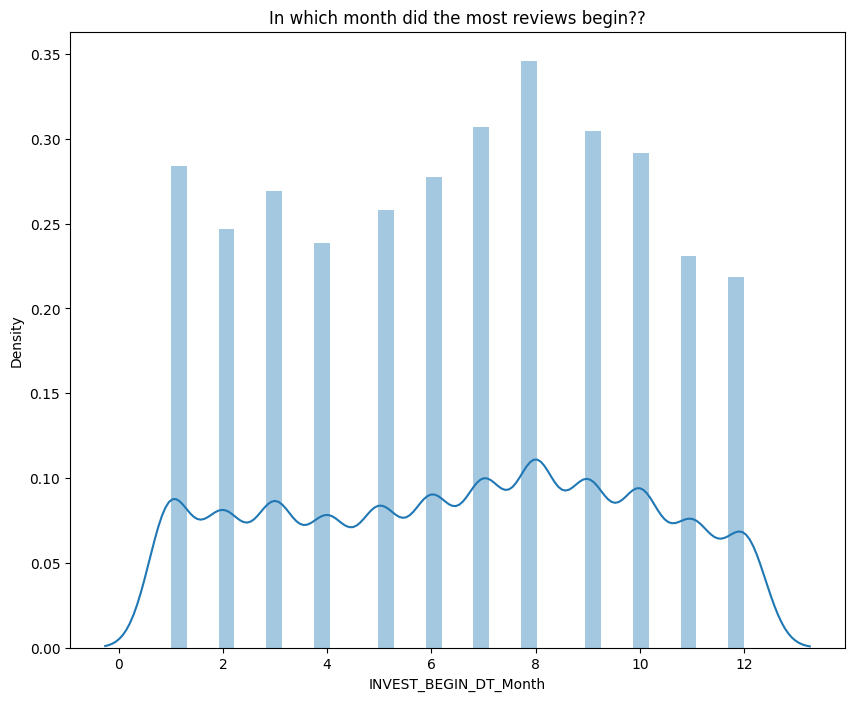

In [21]:
plt.figure(figsize=(10,8))
plt.title('In which month did the most reviews begin??')
sns.distplot(df_coal.INVEST_BEGIN_DT_Month)

<Axes: title={'center': 'In which day did the most reviews begin??'}, xlabel='INVEST_BEGIN_DT_Weekday', ylabel='Density'>

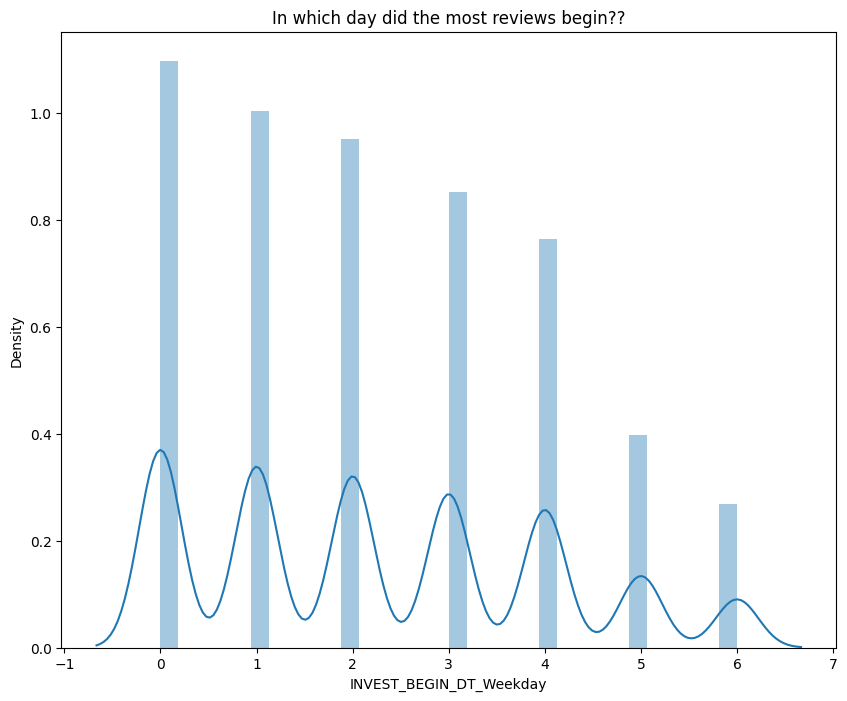

In [22]:
plt.figure(figsize=(10,8))
plt.title('In which day did the most reviews begin??')#monday
sns.distplot(df_coal.INVEST_BEGIN_DT_Weekday)

In [23]:
#EN ÇOK NERDE KAZA OLUYOR?

In [24]:
df_coal['SUBUNIT'].value_counts()

UNDERGROUND                         87258
STRIP, QUARY, OPEN PIT              17904
MILL OPERATION/PREPARATION PLANT     8246
SURFACE AT UNDERGROUND               5655
AUGER                                 387
INDEPENDENT SHOPS OR YARDS            375
OFFICE WORKERS AT MINE SITE           251
CULM BANK/REFUSE PILE                 212
DREDGE                                 39
Name: SUBUNIT, dtype: int64

|DEGREE_INJURY|VARCHAR2|30|Kişinin yaralanma/hastalık derecesinin açıklaması: (00) Yalnızca kaza; (01) Ölüm; (02) Kalıcı tam veya kalıcı kısmi sakatlık; (03) Yalnızca işten uzak kalınan günler; (04) İşten ve kısıtlı faaliyetten uzak geçirilen günler; (05) Yalnızca kısıtlı faaliyet günleri; (06) İşten izin günü yok, kısıtlama yok; (07) Derece 1-6 olmayan meslek hastalığı; (08) Doğal nedenlere bağlı yaralanmalar; (09) Çalışan olmayanların dahil olduğu yaralanmalar; (10) Diğer tüm durumlar (1. yardım dahil); (?) Değer bulunamadı.

Description of the degree of injury/illness to the individual: (00) Accident only; (01) Fatality; (02) Permanent total or permanent partial disability; (03) Days away from work only; (04) Days away from work and restricted activity; (05) Days restricted activity only; (06) No days away from work, no restrictions; (07) Occupational illness not degree 1-6; (08) Injuries due to natural causes; (09) Injuries involving non-employees; (10) All other cases (incl. 1st aid); (?) No value found.

In [25]:
df_coal['DEGREE_INJURY'].value_counts()

DAYS AWAY FROM WORK ONLY          51417
NO DYS AWY FRM WRK,NO RSTR ACT    26143
ACCIDENT ONLY                     24214
DAYS RESTRICTED ACTIVITY ONLY      5686
OCCUPATNAL ILLNESS NOT DEG 1-6     5243
DYS AWY FRM WRK & RESTRCTD ACT     4837
PERM TOT OR PERM PRTL DISABLTY      958
FATALITY                            526
ALL OTHER CASES (INCL 1ST AID)      488
NO VALUE FOUND                      394
INJURIES DUE TO NATURAL CAUSES      349
INJURIES INVOLVNG NONEMPLOYEES       72
Name: DEGREE_INJURY, dtype: int64

In [26]:
df_coal['DEGREE_INJURY'] = df_coal['DEGREE_INJURY'].map({ "FATALITY":1, "PERM TOT OR PERM PRTL DISABLTY":2, "DAYS AWAY FROM WORK ONLY":3,"DYS AWY FRM WRK & RESTRCTD ACT":4, "DAYS RESTRICTED ACTIVITY ONLY":5,"NO DYS AWY FRM WRK,NO RSTR ACT":6, "OCCUPATNAL ILLNESS NOT DEG 1-6":7, "INJURIES DUE TO NATURAL CAUSES":8, "INJURIES INVOLVNG NONEMPLOYEES":9, "ALL OTHER CASES (INCL 1ST AID)":10,"NO VALUE FOUND":11})


In [27]:
df_coal['DEGREE_INJURY'].value_counts().sort_values()

9.0        72
8.0       349
11.0      394
10.0      488
1.0       526
2.0       958
4.0      4837
7.0      5243
5.0      5686
6.0     26143
3.0     51417
Name: DEGREE_INJURY, dtype: int64

In [28]:
df_coal['IMMED_NOTIFY'].value_counts()#Kazanın hemen MSHA'ya bildirilmesi gereken 12 türden biri olup olmadığını açıklayan kod açıklaması

NO VALUE FOUND          71340
NOT MARKED              24211
ROOF FALL               16228
SERIOUS INJURY           3371
HOISTING                 2316
MINE FIRE                 720
GAS OF DUST IGNITION      706
DEATH                     525
ENTRAPMENT                343
INNUMDATION               287
OUTBURST                  118
OFFSITE INJURY            114
EXPLOSIVES                 35
IMPOUNDING DAM             13
Name: IMMED_NOTIFY, dtype: int64

In [29]:
df_coal['RETURN_TO_WORK_DT']=pd.to_datetime(df_coal['RETURN_TO_WORK_DT'])

df_coal['RETURN_TO_WORK_Year']=df_coal['RETURN_TO_WORK_DT'].dt.year
df_coal['RETURN_TO_WORK_Month']=df_coal['RETURN_TO_WORK_DT'].dt.month
df_coal['RETURN_TO_WORK_Weekday']=df_coal['RETURN_TO_WORK_DT'].dt.dayofweek
df_coal['RETURN_TO_WORKM_onth_Name']=df_coal['RETURN_TO_WORK_DT'].dt.month_name()
df_coal['RETURN_TO_WORK_Weekday_Name']=df_coal['RETURN_TO_WORK_DT'].dt.day_name()

df_coal=df_coal.drop('RETURN_TO_WORK_DT',axis=1)

In [30]:
df_coal['ACCIDENT_DT']=pd.to_datetime(df_coal['ACCIDENT_DT'])

df_coal['ACCIDENT_DT_Year']=df_coal['ACCIDENT_DT'].dt.year
df_coal['ACCIDENT_DT_Month']=df_coal['ACCIDENT_DT'].dt.month
df_coal['ACCIDENT_DT_Weekday']=df_coal['ACCIDENT_DT'].dt.dayofweek
df_coal['ACCIDENT_DT_Month_Name']=df_coal['ACCIDENT_DT'].dt.month_name()
df_coal['ACCIDENT_DT_Weekday_Name']=df_coal['ACCIDENT_DT'].dt.day_name()

df_coal=df_coal.drop('ACCIDENT_DT',axis=1)

<Axes: xlabel='ACCIDENT_DT_Year', ylabel='Density'>

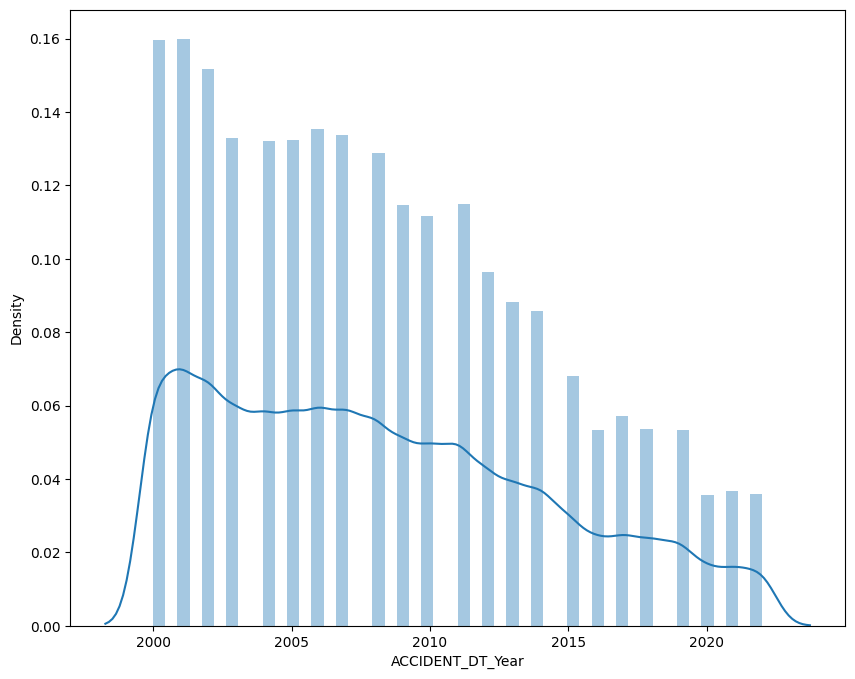

In [31]:
plt.figure(figsize=(10,8))
sns.distplot(df_coal.ACCIDENT_DT_Year)

<Axes: xlabel='RETURN_TO_WORK_Year', ylabel='Density'>

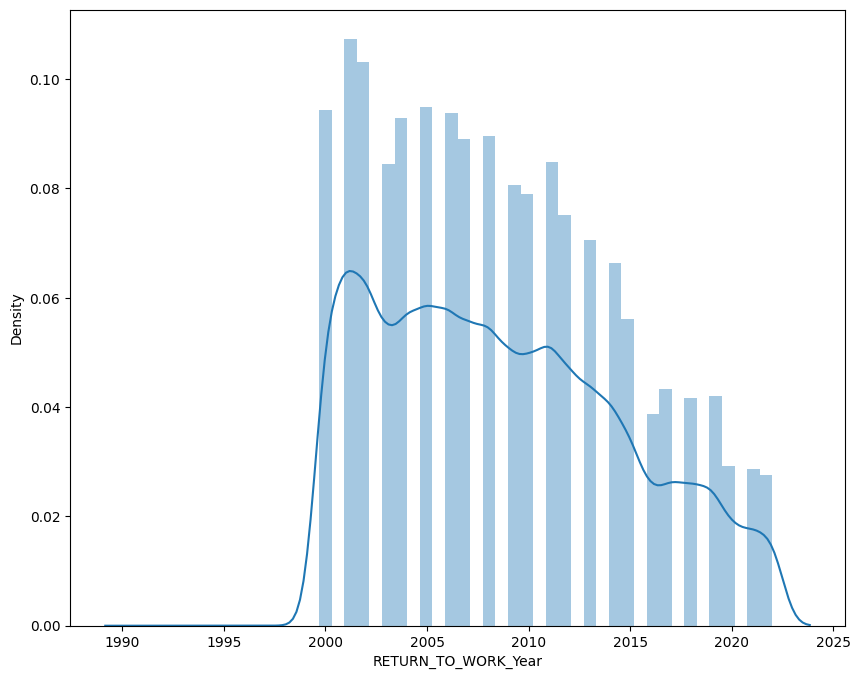

In [32]:
plt.figure(figsize=(10,8))
sns.distplot(df_coal.RETURN_TO_WORK_Year)

<Axes: title={'center': 'In which year did the most reviews begin??'}, xlabel='INVEST_BEGIN_DT_Year', ylabel='Density'>

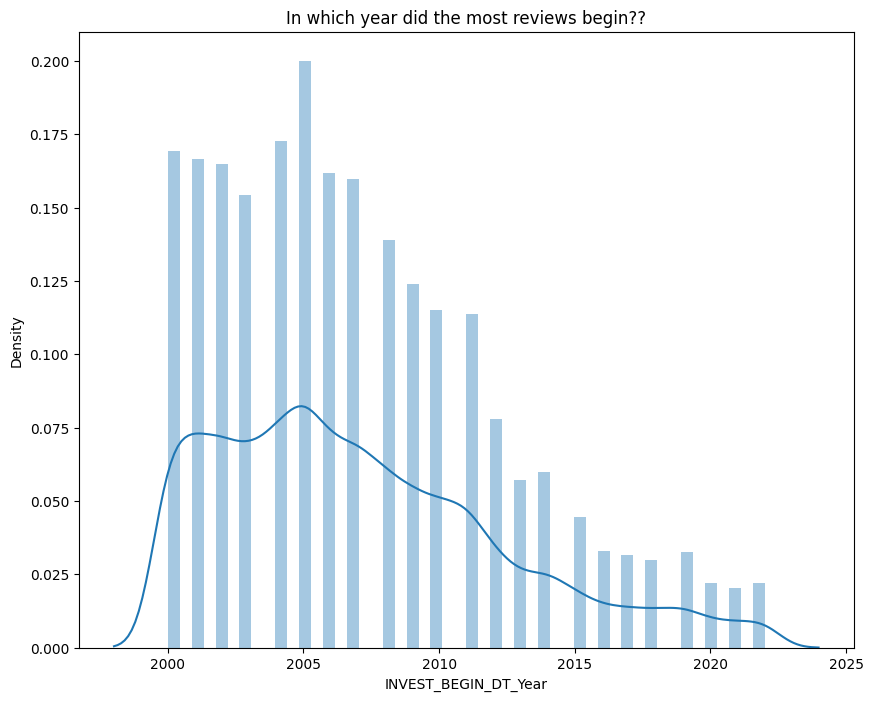

In [33]:
plt.figure(figsize=(10,8))
plt.title('In which year did the most reviews begin??')
sns.distplot(df_coal.INVEST_BEGIN_DT_Year)

In [34]:
df_coal['MINING_EQUIP'].value_counts()#Kazaya karışan madencilik ekipmanının türü için açıklama
#burdan biz insan kontrolüne bırakılan durumlarda daha fazla kaza oluyor

NO VALUE FOUND                                                      70838
Hand tools (not powered)                                             9321
Rock or roof bolting machine, Pinning machine, Truss bolter          7970
Continuous miner, Tunnel borer, Road header                          3159
Elevator, Skip, Cage, Buckets, Mancage, Slope car                    2998
                                                                    ...  
Tamping machine                                                         2
Slusher, Scraper hoist, Slusher hoist                                   2
Dimension stone machinery, Gangwire saw, Guillotine, Hydrosplit         1
Rotary dump, Dump rail                                                  1
Hydraulic jets, Monitor                                                 1
Name: MINING_EQUIP, Length: 67, dtype: int64

In [35]:
df_coal['ACCIDENT_TIME'].value_counts().sort_values()#Kazanın/yaralanmanın/hastalığın meydana geldiği saat

2157.0        1
111.0         1
656.0         1
513.0         1
609.0         1
          ...  
1030.0     2152
900.0      2266
1100.0     2467
1000.0     3022
9999.0    10243
Name: ACCIDENT_TIME, Length: 1384, dtype: int64

In [36]:
df_coal['ACCIDENT_TIME'] = df_coal['ACCIDENT_TIME'].astype(str).str.replace(".", "", n=2).astype(float) / 100

In [37]:
df_coal['ACCIDENT_TIME'].value_counts()#99.99 boş veri, regression yaparken sil

999.9    10243
100.0     3022
110.0     2467
90.0      2266
103.0     2152
         ...  
235.2        1
161.1        1
190.6        1
230.3        1
215.7        1
Name: ACCIDENT_TIME, Length: 1384, dtype: int64

In [38]:
df_coal['EQUIP_MFR_NAME'].value_counts()#Kazaya karışan bir makinenin madencilik makinesi üreticisi

NO VALUE FOUND                       70858
Not Reported                         20105
Not on this list                      5775
Caterpillar                           5433
Fletcher                              4489
                                     ...  
Koehring                                 1
Telsmith                                 1
Badger Construction Equipment Co.        1
Mine Equipment Co.                       1
Kersey                                   1
Name: EQUIP_MFR_NAME, Length: 172, dtype: int64

In [39]:
df_coal['SHIFT_BEGIN_TIME'].value_counts()#Olayın meydana geldiği vardiyanın başladığı saat (24 saatlik).

700.0     23900
600.0     14729
1500.0    11448
2300.0     9795
1600.0     8257
          ...  
812.0         1
724.0         1
1848.0        1
1148.0        1
325.0         1
Name: SHIFT_BEGIN_TIME, Length: 336, dtype: int64

In [40]:
df_coal['SHIFT_BEGIN_TIME'] = df_coal['SHIFT_BEGIN_TIME'].astype(str).str.replace(".", "", n=2).astype(float) / 100

In [41]:
df_coal['SHIFT_BEGIN_TIME'].value_counts()

70.0     23900
60.0     14729
150.0    11448
230.0     9795
160.0     8257
         ...  
81.2         1
72.4         1
184.8        1
114.8        1
32.5         1
Name: SHIFT_BEGIN_TIME, Length: 336, dtype: int64

In [42]:
df_coal['CLASSIFICATION'].value_counts()

HANDLING OF MATERIALS                    28531
FALL OF ROOF OR BACK                     25095
SLIP OR FALL OF PERSON                   16761
MACHINERY                                11700
HANDTOOLS (NONPOWERED)                    9764
POWERED HAULAGE                           8907
DISORDERS (REPEATED TRAUMA)               2693
HOISTING                                  2691
DUST DISEASE OF LUNGS                     1919
FALL OF FACE/RIB/PILLAR/SIDE/HIGHWALL     1844
OTHER                                     1708
STEPPING OR KNEELING ON OBJECT            1501
STRIKING OR BUMPING                       1182
NO VALUE FOUND                            1115
IGNITION OR EXPLOSION OF GAS OR DUST       987
FIRE                                       933
ELECTRICAL                                 714
ALL OTHER OCCUPATIONAL ILLNESSES           450
EXPLODING VESSELS UNDER PRESSURE           406
ENTRAPMENT                                 351
INUNDATION                                 339
FALLING/SLIDI

In [43]:
df_coal['ACCIDENT_TYPE'].value_counts()

Accident type, without injuries                                     24215
Struck by falling object                                            13715
Struck by... NEC                                                    12517
Over-exertion NEC                                                   11991
Over-exertion in lifting objects                                     7362
Caught in, under or between a moving and a stationary object         6807
Struck against stationary object                                     6145
Struck against a moving object                                       4918
Fall to the walkway or working surface                               4764
Struck by flying object                                              3518
Caught in, under or between NEC                                      3339
Fall onto or against objects                                         3070
Over-exertion in pulling or pushing objects                          2886
Fall from machine                     

In [44]:
df_coal['TOT_EXPER'].value_counts()

10.00    2743
20.00    2582
5.00     2535
3.00     2349
2.00     2182
         ... 
13.32       1
13.35       1
33.26       1
28.55       1
4.59        1
Name: TOT_EXPER, Length: 2911, dtype: int64

In [45]:
df_coal['MINE_EXPER'].value_counts()

2.00     4522
1.00     4299
3.00     3592
4.00     2530
5.00     2435
         ... 
37.90       1
17.33       1
9.03        1
21.82       1
27.34       1
Name: MINE_EXPER, Length: 2584, dtype: int64

In [46]:
df_coal['JOB_EXPER'].value_counts()

2.00     5079
1.00     4543
3.00     3933
5.00     3414
10.00    3269
         ... 
22.42       1
21.32       1
13.33       1
38.42       1
39.10       1
Name: JOB_EXPER, Length: 2376, dtype: int64

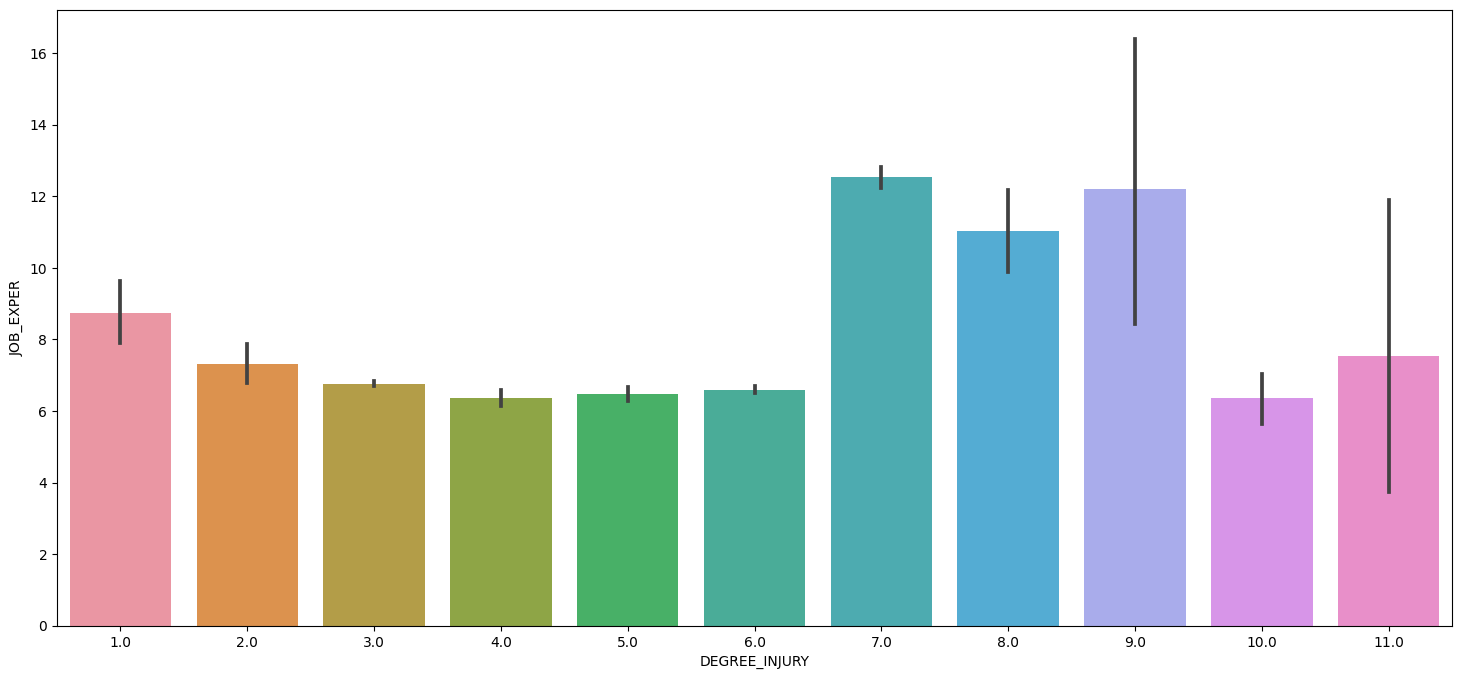

In [47]:
plt.figure(figsize=(18,8))
sns.barplot(data=df_coal,x="DEGREE_INJURY",y="JOB_EXPER")
plt.show()
#07) Derece 1-6 olmayan meslek hastalığı; (08) Doğal nedenlere bağlı yaralanmalar; (09) Çalışan olmayanların dahil olduğu yaralanmalar; 

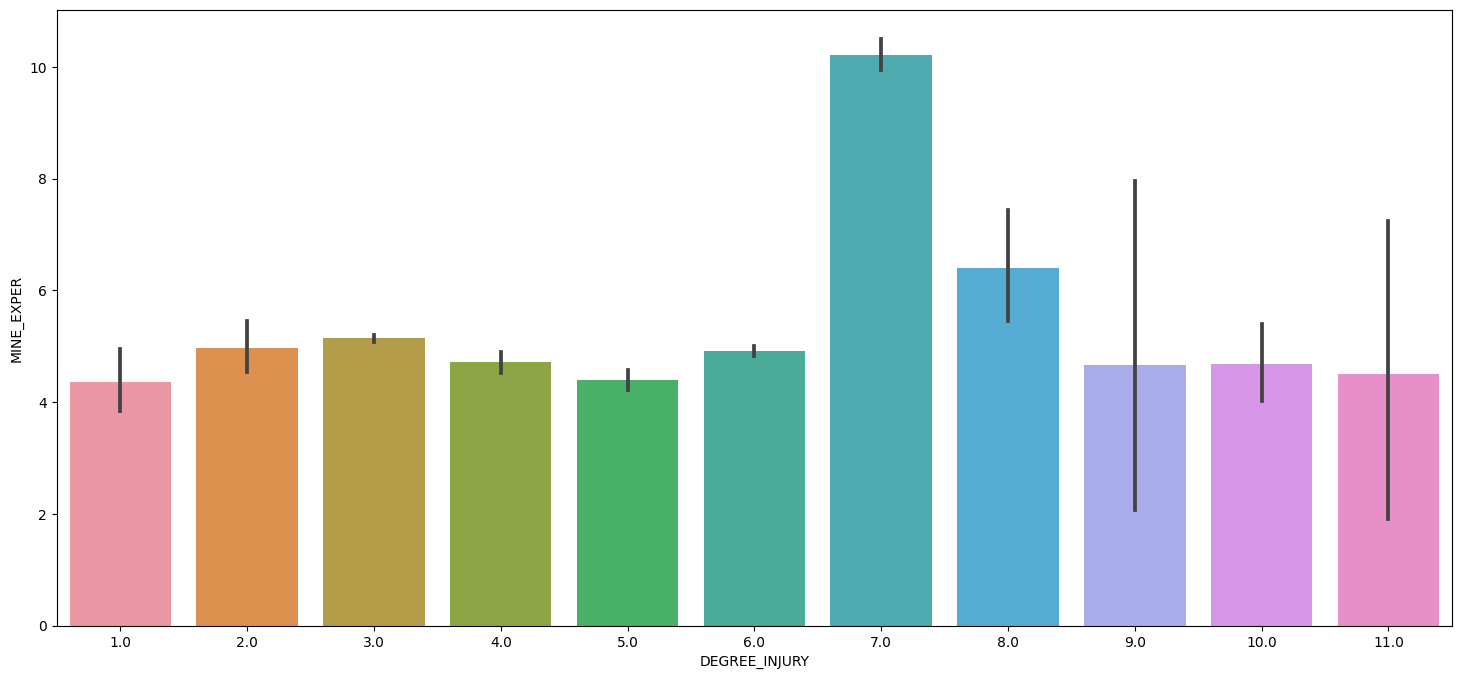

In [48]:
plt.figure(figsize=(18,8))
sns.barplot(data=df_coal,x="DEGREE_INJURY",y="MINE_EXPER")
plt.show()

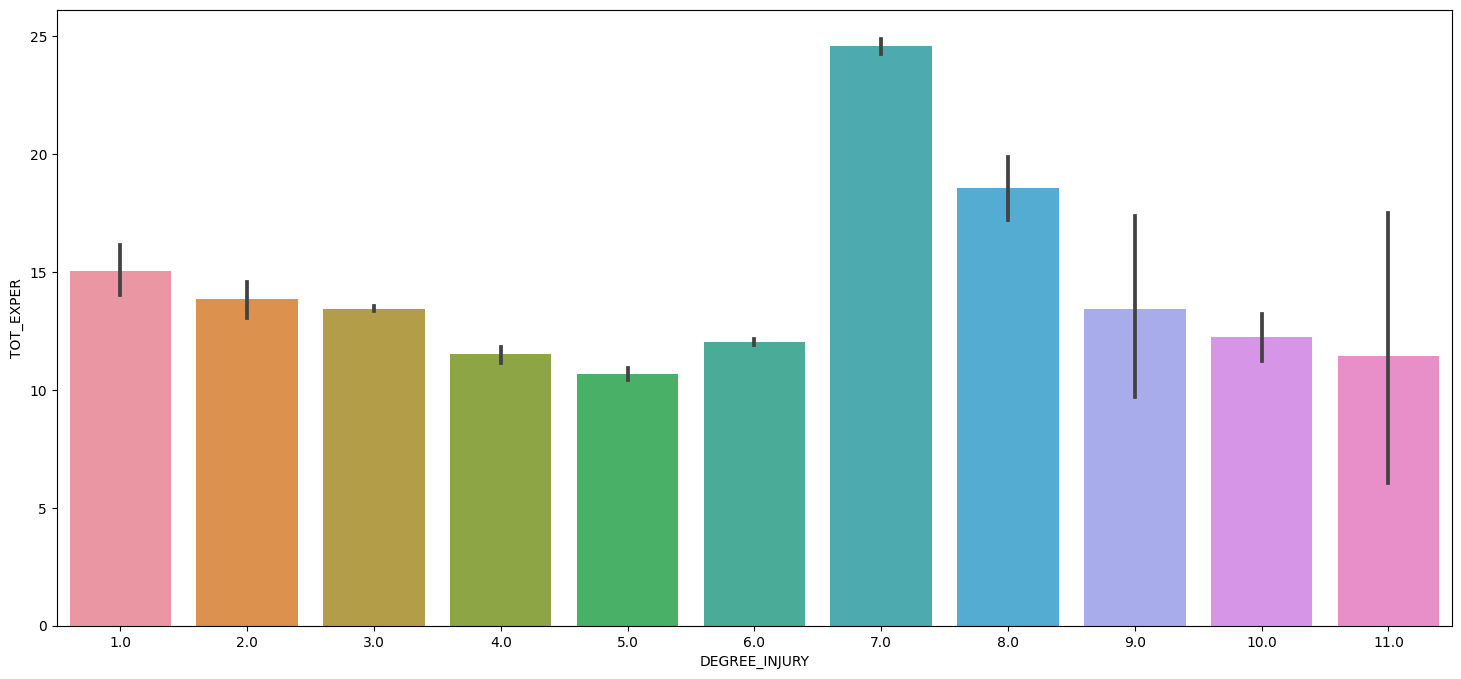

In [49]:
plt.figure(figsize=(18,8))
sns.barplot(data=df_coal,x="DEGREE_INJURY",y="TOT_EXPER")
plt.show()#Etkilenen kişinin ondalık yıllarda hesaplanan toplam madencilik deneyimi. Hesaplama, hem yıllara hem de aylara ilişkin deneyimi kullanı

In [50]:
df_coal['OCCUPATION'].value_counts()#Kaza kurbanının normal iş unvanının üç haneli meslek kodu açıklaması

NO VALUE FOUND                                                                                       24830
Roof bolter, Rock bolter,  Pinner, Mobile roof support operator (MRS)                                13343
Maintenance man, Mechanic,  Repair/Serviceman, Boilermaker, Fueler, Tire tech, Field service tech    12149
Laborer, Bull gang,  Parts runner, Roustabout, Roof trimmer/scaler                                    8695
Laborer, Bull gang, Faceman, Parts runner, Roustabout, Roof trimmer/scaler                            4911
                                                                                                     ...  
Face worker-Shaft/Slope sinking                                                                          1
Cage/Cager/Station attendant, Aerial tram (outside only)                                                 1
Water line man                                                                                           1
Plumber, Pipefitter, Millwright      

In [51]:
df_coal['ACTIVITY'].value_counts()
#HAND TOOLS YUKARIDA EN FAZLA İDİ, DEMEK Kİ BOŞ VERİLERİN BİR KISMI BUNA AİT

NO VALUE FOUND                   25301
Handling supplies or material    16629
Machine maintenance              10388
Hand tools (not powered)          8777
Walking, Running                  8762
                                 ...  
Loading machine                      3
Climb in raise, Shaft, Manway        2
Impactor                             2
Assault and battery, Murder          1
Shortwall                            1
Name: ACTIVITY, Length: 97, dtype: int64

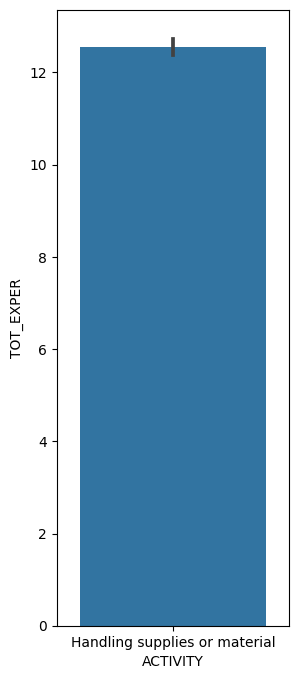

In [52]:
plt.figure(figsize=(3,8))
sns.barplot(data=df_coal[df_coal["ACTIVITY"] == 'Handling supplies or material'], x="ACTIVITY", y="TOT_EXPER")
plt.ylabel("TOT_EXPER")
plt.show()

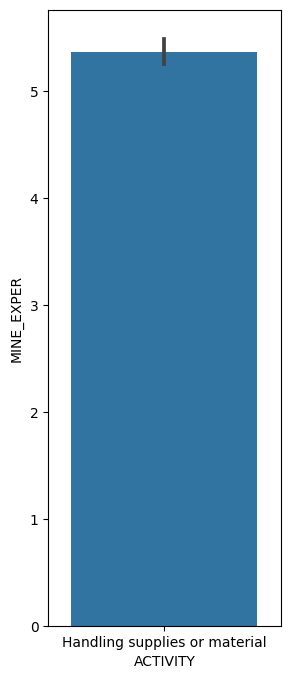

In [53]:
plt.figure(figsize=(3,8))
sns.barplot(data=df_coal[df_coal["ACTIVITY"] == 'Handling supplies or material'], x="ACTIVITY", y="MINE_EXPER")#Sarf malzemelerinin veya malzemelerin taşınması
plt.ylabel("MINE_EXPER")
plt.show()

In [54]:
df_coal['NO_INJURIES'].value_counts()#Kazadan kaynaklanan bildirilebilir yaralanma veya hastalık sayısı. . Kazada hiçbir çalışan yaralanmadıysa veya yaralanma rapor edilemezse sıfır geçerli bir sayıdır.(AZ KALSINLAR ÖNEMLİ,KAZANIN OLUP OLMAMASINA)


1     95208
0     24215
2       564
3       102
4        68
6        42
36       36
16       16
5        15
14       14
13       13
10       10
9         9
8         8
7         7
Name: NO_INJURIES, dtype: int64

In [55]:
df_coal['INJURY_SOURCE'].value_counts()#Yaralanma veya hastalığın kaynağını tanımlayan kod. Yaralanmanın kaynağı, doğrudan yaralanmaya neden olan nesneyi, maddeleri, maruziyeti veya bedensel hareketi tanımlar. 

NO VALUE FOUND               25352
METAL,NEC(PIPE,WIRE,NAIL)     9420
CAVING ROCK,COAL,ORE,WSTE     9298
MINE FLOOR,BOTTOM,FOOTWAL     6967
METAL COVERS & GUARDS         5677
                             ...  
TOWERS,POLES,ETC                 2
MINE HEADFRAME                   2
LANDSLIDE (SURF ONLY)            2
METHANE GAS-IN MNE & PROC        2
DAMS,LOCKS,PONDS,BRIDGES         1
Name: INJURY_SOURCE, Length: 125, dtype: int64

In [56]:
df_coal['INJ_BODY_PART'].value_counts()

NO VALUE FOUND                             25460
FINGER(S)/THUMB                            14584
BACK (MUSCLES/SPINE/S-CORD/TAILBONE)       13224
KNEE/PATELLA                                8054
MULTIPLE PARTS (MORE THAN ONE MAJOR)        5777
SHOULDERS (COLLARBONE/CLAVICLE/SCAPULA)     5523
HAND (NOT WRIST OR FINGERS)                 5138
CHEST (RIBS/BREAST BONE/CHEST ORGNS)        3576
ANKLE                                       3551
EYE(S) OPTIC NERVE/VISON                    2936
FOOT(NOT ANKLE/TOE)/TARSUS/METATARSUS       2888
WRIST                                       2715
HIPS (PELVIS/ORGANS/KIDNEYS/BUTTOCKS)       2448
HEAD,NEC                                    2404
NECK                                        2348
FOREARM/ULNAR/RADIUS                        1827
LOWER LEG/TIBIA/FIBULA                      1759
MOUTH/LIP/TEETH/TONGUE/THROAT/TASTE         1513
LEG, NEC                                    1494
ARM,NEC                                     1449
EAR(S) INTERNAL & HE

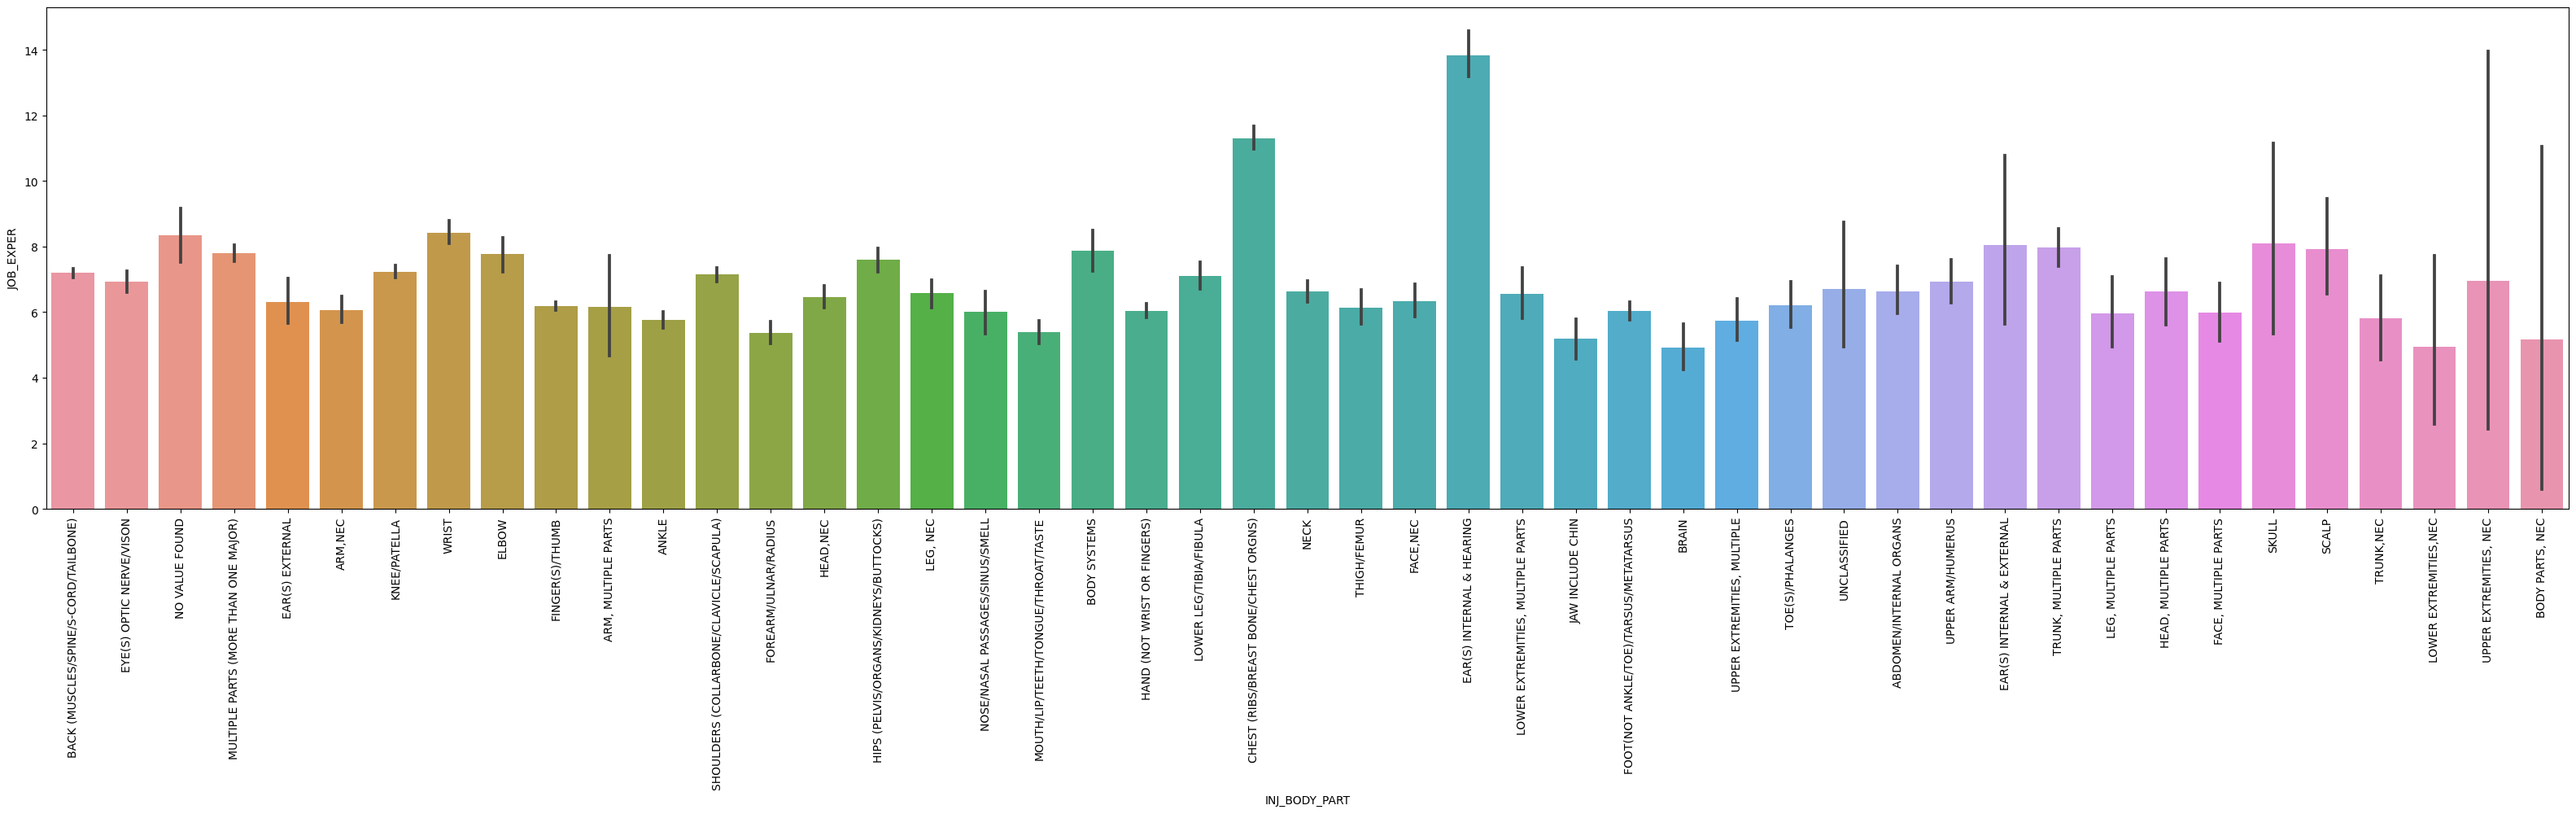

In [57]:
plt.figure(figsize=(40,8))
sns.barplot(data=df_coal,x="INJ_BODY_PART",y="JOB_EXPER")
plt.xticks(rotation=90) 
plt.show()

In [58]:
df_coal['SCHEDULE_CHARGE'].value_counts()#Kalıcı yaralanma/hastalık için kaybedilen gün cinsinden ücret. Örnek: Bir vefat için 6000 gün, bir ayağın bilekten kaybedilmesi için 2400 gün

0.0       86772
6000.0      782
50.0        269
600.0       188
300.0       145
          ...  
138.0         1
437.0         1
246.0         1
840.0         1
693.0         1
Name: SCHEDULE_CHARGE, Length: 202, dtype: int64

In [59]:
df_coal['DAYS_RESTRICT'].value_counts()

0.0      75663
5.0        711
3.0        641
2.0        627
4.0        561
         ...  
166.0        1
310.0        1
215.0        1
223.0        1
153.0        1
Name: DAYS_RESTRICT, Length: 267, dtype: int64

In [60]:
df_coal['DAYS_LOST'].value_counts()#Yaralanma/hastalık nedeniyle işten kaybedilen gerçek gün sayısı. Durum geçerli değilse boş değerler içermeyebilir.(PREDİCTİON DA X OLABİLİR.KAZA OLAN YERE,DENEYİME , GERÇEKLEŞME MEVSİMİNE GÖRE KAYBEDİLECEK GÜN SAYISI TAHMİN EDİLEBİLİR)

0.0      43353
2.0       3286
1.0       3050
3.0       2599
4.0       1875
         ...  
658.0        1
853.0        1
728.0        1
670.0        1
439.0        1
Name: DAYS_LOST, Length: 559, dtype: int64

In [61]:
df_coal['TRANS_TERM'].value_counts()

N    87708
Y     6028
Name: TRANS_TERM, dtype: int64

In [62]:
df_coal['NARRATIVE']=df_coal['NARRATIVE'].str.lower()
df_coal['NARRATIVE']=df_coal['NARRATIVE'].str.replace("[^a-zA-Z0-9\s]",'')
df_coal['NARRATIVE']=df_coal['NARRATIVE'].str.replace('\d+','')
df_coal['NARRATIVE']=df_coal['NARRATIVE'].str.replace('\n','').replace('\r','')

In [63]:
df_coal['NARRATIVE'].isnull().sum()

2

In [64]:
df_coal = df_coal[df_coal['NARRATIVE'].notnull()]

In [65]:
df_coal['NARRATIVE'].isnull().sum()

0

In [66]:
df_coal['NARRATIVE']

20        while operating a loader loose material dislod...
21        ee was moving a caustic line when the line fel...
27        the tyro creek service elevator was out of ser...
28        a roof fall occurred in our west main section ...
29        an oxygen cylinder traveled thru the pick brea...
                                ...                        
252484    upon arriving to work with other admin personn...
252490    employee was removing a rock from a conveyor c...
252491    a roof fall was discovered in the nd rt intake...
252492    employee was changing a hose on a longwall shi...
252494    the boom on a boom truck failed mechanically a...
Name: NARRATIVE, Length: 120325, dtype: object

In [67]:
from langdetect import detect
df_coal['language']=df_coal['NARRATIVE'].apply(detect)
df_coal=df_coal[df_coal['language']=='en']
df_coal

ModuleNotFoundError: ignored

In [68]:
from textblob import TextBlob
df_coal[['polarity','subjectivity']]=df_coal['NARRATIVE'].apply(lambda t:pd.Series(TextBlob(t).sentiment))

In [70]:
from nltk.tokenize import TreebankWordTokenizer
tokenizer=TreebankWordTokenizer()
df_coal['tokenized']=[tokenizer.tokenize(i) for i in df_coal['NARRATIVE'].values]

In [71]:
df_coal

,MINE_ID,CONTROLLER_ID,CONTROLLER_NAME,OPERATOR_ID,OPERATOR_NAME,CONTRACTOR_ID,DOCUMENT_NO,SUBUNIT_CD,SUBUNIT,CAL_YR,CAL_QTR,FISCAL_YR,FISCAL_QTR,ACCIDENT_TIME,DEGREE_INJURY_CD,DEGREE_INJURY,FIPS_STATE_CD,UG_LOCATION_CD,UG_LOCATION,UG_MINING_METHOD_CD,UG_MINING_METHOD,MINING_EQUIP_CD,MINING_EQUIP,EQUIP_MFR_CD,EQUIP_MFR_NAME,EQUIP_MODEL_NO,SHIFT_BEGIN_TIME,CLASSIFICATION_CD,CLASSIFICATION,ACCIDENT_TYPE_CD,ACCIDENT_TYPE,NO_INJURIES,TOT_EXPER,MINE_EXPER,JOB_EXPER,OCCUPATION_CD,OCCUPATION,ACTIVITY_CD,ACTIVITY,INJURY_SOURCE_CD,INJURY_SOURCE,NATURE_INJURY_CD,NATURE_INJURY,INJ_BODY_PART_CD,INJ_BODY_PART,SCHEDULE_CHARGE,DAYS_RESTRICT,DAYS_LOST,TRANS_TERM,IMMED_NOTIFY_CD,IMMED_NOTIFY,INVEST_BEGIN_DT,NARRATIVE,CLOSED_DOC_NO,COAL_METAL_IND,INVEST_BEGIN_DT_Year,INVEST_BEGIN_DT_Month,INVEST_BEGIN_DT_Weekday,INVEST_BEGIN_DT_Month_Name,INVEST_BEGIN_DT_Weekday_Name,RETURN_TO_WORK_Year,RETURN_TO_WORK_Month,RETURN_TO_WORK_Weekday,RETURN_TO_WORKM_onth_Name,RETURN_TO_WORK_Weekday_Name,ACCIDENT_DT_Year,ACCIDENT_DT_Month,ACCIDENT_DT_Weekday,ACCIDENT_DT_Month_Name,ACCIDENT_DT_Weekday_Name,polarity,subjectivity,tokenized
20,100347,C00992,Walter Energy Incorporated,P22745,Taft Coal Sales & Associates Incorporated,NaN,220130660034,3,"STRIP, QUARY, OPEN PIT",2013,1,2013,2,123.0,03,3.0,1,?,NO VALUE FOUND,?,NO VALUE FOUND,24,"Front-end loader, Tractor-shovel, Payloader, H...",121,Not Reported,NaN,50.0,12,POWERED HAULAGE,02,Struck against a moving object,1,10.33,10.33,10.33,382,"Front-end loader, Scraper-loader operator, Pan...",053,Front-end loader,076,SURFACE MINING MACHINES,160,"CONTUSN,BRUISE,INTAC SKIN",420,BACK (MUSCLES/SPINE/S-CORD/TAILBONE),0.0,0.0,5.0,N,?,NO VALUE FOUND,NaT,while operating a loader loose material dislod...,3.201307e+11,C,NaN,NaN,NaN,NaN,NaN,2013.0,3.0,0.0,March,Monday,2013,2,3,February,Thursday,0.102885,0.297196,"[while, operating, a, loader, loose, material,..."
21,100347,C00992,Walter Energy Incorporated,P22745,Taft Coal Sales & Associates Incorporated,NaN,220142580027,30,MILL OPERATION/PREPARATION PLANT,2014,3,2014,4,133.0,06,6.0,1,?,NO VALUE FOUND,?,NO VALUE FOUND,?,NO VALUE FOUND,?,NO VALUE FOUND,NaN,53.0,09,HANDLING OF MATERIALS,38,"Absorption of radiations, caustics, toxic and ...",1,8.77,8.77,3.69,304,"Maintenance man, Mechanic, Repair/Serviceman,...",028,Handling supplies or material,024,"CHEMICALS,CHEM COMP,NEC",130,"BURN,CHEMICL-FUME,COMPOUN",130,EYE(S) OPTIC NERVE/VISON,0.0,0.0,0.0,N,?,NO VALUE FOUND,NaT,ee was moving a caustic line when the line fel...,NaN,C,NaN,NaN,NaN,NaN,NaN,2014.0,9.0,1.0,September,Tuesday,2014,9,0,September,Monday,-0.400000,0.600000,"[ee, was, moving, a, caustic, line, when, the,..."
27,100759,C00877,Chevron Corporation,P01032,Chevron Mining Inc,NaN,220041660144,1,UNDERGROUND,2004,2,2004,3,140.4,00,NaN,1,01,VERTICAL SHAFT,?,NO VALUE FOUND,19,"Elevator, Skip, Cage, Buckets, Mancage, Slope ...",119,Not on this list,NaN,140.0,13,HOISTING,44,"Accident type, without injuries",0,NaN,NaN,NaN,?,NO VALUE FOUND,?,NO VALUE FOUND,?,NO VALUE FOUND,?,NO VALUE FOUND,?,NO VALUE FOUND,0.0,0.0,0.0,NaN,11,HOISTING,2004-06-10,the tyro creek service elevator was out of ser...,NaN,C,2004.0,6.0,3.0,June,Thursday,NaN,NaN,NaN,NaN,NaN,2004,6,3,June,Thursday,-0.175000,0.275000,"[the, tyro, creek, service, elevator, was, out..."
28,100759,C00877,Chevron Corporation,P01032,Chevron Mining Inc,NaN,220041960040,1,UNDERGROUND,2004,3,2004,4,13.0,00,NaN,1,04,INTERSECTION,05,Continuous Mining,?,NO VALUE FOUND,?,NO VALUE FOUND,NaN,220.0,07,FALL OF ROOF OR BACK,44,"Accident type, without injuries",0,NaN,NaN,NaN,?,NO VALUE FOUND,?,NO VALUE FOUND,?,NO VALUE FOUND,?,NO VALUE FOUND,?,NO VALUE FOUND,0.0,0.0,0.0,NaN,08,ROOF FALL,2004-07-10,a roof fall occurred in our west main section ...,NaN,C,2004.0,7.0,5.0,July,Saturday,NaN,NaN,NaN,NaN,NaN,2004,7,5,July,Saturday,-0.044667,0.454667,"[a, roof, fall, occurred, in, our, west, main,..."
29,100759,C00877,Chevron Corporation,P01032,Chevron Mining Inc,NaN,220052730044,1,UNDERGROUND,2005,3,2005,

In [72]:
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
df_coal['lemmatize']=[[lemmatizer.lemmatize(str(i)) for i in words] for words in df_coal['NARRATIVE'].values]

LookupError: ignored

In [ ]:
df_coal

In [73]:
df_coal.loc[df_coal['subjectivity']>0.5,'sentiment']=2 #pozitive
df_coal.loc[df_coal['subjectivity']==0.5,'sentiment']=1 #neutral
df_coal.loc[df_coal['subjectivity']<0.5,'sentiment']=0 #negative
df_coal

,MINE_ID,CONTROLLER_ID,CONTROLLER_NAME,OPERATOR_ID,OPERATOR_NAME,CONTRACTOR_ID,DOCUMENT_NO,SUBUNIT_CD,SUBUNIT,CAL_YR,CAL_QTR,FISCAL_YR,FISCAL_QTR,ACCIDENT_TIME,DEGREE_INJURY_CD,DEGREE_INJURY,FIPS_STATE_CD,UG_LOCATION_CD,UG_LOCATION,UG_MINING_METHOD_CD,UG_MINING_METHOD,MINING_EQUIP_CD,MINING_EQUIP,EQUIP_MFR_CD,EQUIP_MFR_NAME,EQUIP_MODEL_NO,SHIFT_BEGIN_TIME,CLASSIFICATION_CD,CLASSIFICATION,ACCIDENT_TYPE_CD,ACCIDENT_TYPE,NO_INJURIES,TOT_EXPER,MINE_EXPER,JOB_EXPER,OCCUPATION_CD,OCCUPATION,ACTIVITY_CD,ACTIVITY,INJURY_SOURCE_CD,INJURY_SOURCE,NATURE_INJURY_CD,NATURE_INJURY,INJ_BODY_PART_CD,INJ_BODY_PART,SCHEDULE_CHARGE,DAYS_RESTRICT,DAYS_LOST,TRANS_TERM,IMMED_NOTIFY_CD,IMMED_NOTIFY,INVEST_BEGIN_DT,NARRATIVE,CLOSED_DOC_NO,COAL_METAL_IND,INVEST_BEGIN_DT_Year,INVEST_BEGIN_DT_Month,INVEST_BEGIN_DT_Weekday,INVEST_BEGIN_DT_Month_Name,INVEST_BEGIN_DT_Weekday_Name,RETURN_TO_WORK_Year,RETURN_TO_WORK_Month,RETURN_TO_WORK_Weekday,RETURN_TO_WORKM_onth_Name,RETURN_TO_WORK_Weekday_Name,ACCIDENT_DT_Year,ACCIDENT_DT_Month,ACCIDENT_DT_Weekday,ACCIDENT_DT_Month_Name,ACCIDENT_DT_Weekday_Name,polarity,subjectivity,tokenized,sentiment
20,100347,C00992,Walter Energy Incorporated,P22745,Taft Coal Sales & Associates Incorporated,NaN,220130660034,3,"STRIP, QUARY, OPEN PIT",2013,1,2013,2,123.0,03,3.0,1,?,NO VALUE FOUND,?,NO VALUE FOUND,24,"Front-end loader, Tractor-shovel, Payloader, H...",121,Not Reported,NaN,50.0,12,POWERED HAULAGE,02,Struck against a moving object,1,10.33,10.33,10.33,382,"Front-end loader, Scraper-loader operator, Pan...",053,Front-end loader,076,SURFACE MINING MACHINES,160,"CONTUSN,BRUISE,INTAC SKIN",420,BACK (MUSCLES/SPINE/S-CORD/TAILBONE),0.0,0.0,5.0,N,?,NO VALUE FOUND,NaT,while operating a loader loose material dislod...,3.201307e+11,C,NaN,NaN,NaN,NaN,NaN,2013.0,3.0,0.0,March,Monday,2013,2,3,February,Thursday,0.102885,0.297196,"[while, operating, a, loader, loose, material,...",0.0
21,100347,C00992,Walter Energy Incorporated,P22745,Taft Coal Sales & Associates Incorporated,NaN,220142580027,30,MILL OPERATION/PREPARATION PLANT,2014,3,2014,4,133.0,06,6.0,1,?,NO VALUE FOUND,?,NO VALUE FOUND,?,NO VALUE FOUND,?,NO VALUE FOUND,NaN,53.0,09,HANDLING OF MATERIALS,38,"Absorption of radiations, caustics, toxic and ...",1,8.77,8.77,3.69,304,"Maintenance man, Mechanic, Repair/Serviceman,...",028,Handling supplies or material,024,"CHEMICALS,CHEM COMP,NEC",130,"BURN,CHEMICL-FUME,COMPOUN",130,EYE(S) OPTIC NERVE/VISON,0.0,0.0,0.0,N,?,NO VALUE FOUND,NaT,ee was moving a caustic line when the line fel...,NaN,C,NaN,NaN,NaN,NaN,NaN,2014.0,9.0,1.0,September,Tuesday,2014,9,0,September,Monday,-0.400000,0.600000,"[ee, was, moving, a, caustic, line, when, the,...",2.0
27,100759,C00877,Chevron Corporation,P01032,Chevron Mining Inc,NaN,220041660144,1,UNDERGROUND,2004,2,2004,3,140.4,00,NaN,1,01,VERTICAL SHAFT,?,NO VALUE FOUND,19,"Elevator, Skip, Cage, Buckets, Mancage, Slope ...",119,Not on this list,NaN,140.0,13,HOISTING,44,"Accident type, without injuries",0,NaN,NaN,NaN,?,NO VALUE FOUND,?,NO VALUE FOUND,?,NO VALUE FOUND,?,NO VALUE FOUND,?,NO VALUE FOUND,0.0,0.0,0.0,NaN,11,HOISTING,2004-06-10,the tyro creek service elevator was out of ser...,NaN,C,2004.0,6.0,3.0,June,Thursday,NaN,NaN,NaN,NaN,NaN,2004,6,3,June,Thursday,-0.175000,0.275000,"[the, tyro, creek, service, elevator, was, out...",0.0
28,100759,C00877,Chevron Corporation,P01032,Chevron Mining Inc,NaN,220041960040,1,UNDERGROUND,2004,3,2004,4,13.0,00,NaN,1,04,INTERSECTION,05,Continuous Mining,?,NO VALUE FOUND,?,NO VALUE FOUND,NaN,220.0,07,FALL OF ROOF OR BACK,44,"Accident type, without injuries",0,NaN,NaN,NaN,?,NO VALUE FOUND,?,NO VALUE FOUND,?,NO VALUE FOUND,?,NO VALUE FOUND,?,NO VALUE FOUND,0.0,0.0,0.0,NaN,08,ROOF FALL,2004-07-10,a roof fall occurred in our west main section ...,NaN,C,2004.0,7.0,5.0,July,Saturday,NaN,NaN,NaN,NaN,NaN,2004,7,5,July,Saturday,-0.044667,0.454667,"[a, roof, fall, occurred, in, our, west, main,...",0.0
29,100759,C00877,Chevron Corporation,P01032,Chevron Mining Inc,NaN,220052730044,

In [74]:
df_coal.sentiment.value_counts()


0.0    94087
2.0    22201
1.0     4037
Name: sentiment, dtype: int64

In [75]:
abs(df_coal.corr()['DEGREE_INJURY']).sort_values(ascending=False)

DEGREE_INJURY              1.000000
DAYS_LOST                  0.341482
ACCIDENT_TIME              0.274559
RETURN_TO_WORK_Weekday     0.172909
SHIFT_BEGIN_TIME           0.172601
SCHEDULE_CHARGE            0.070494
JOB_EXPER                  0.056777
MINE_EXPER                 0.053604
TOT_EXPER                  0.047770
NO_INJURIES                0.043412
FIPS_STATE_CD              0.039214
INVEST_BEGIN_DT_Year       0.037998
MINE_ID                    0.037656
SUBUNIT_CD                 0.030874
DOCUMENT_NO                0.027203
FISCAL_YR                  0.026496
CAL_YR                     0.026279
ACCIDENT_DT_Year           0.026279
polarity                   0.020415
RETURN_TO_WORK_Year        0.019304
INVEST_BEGIN_DT_Month      0.018561
DAYS_RESTRICT              0.017957
RETURN_TO_WORK_Month       0.016918
ACCIDENT_DT_Weekday        0.016528
INVEST_BEGIN_DT_Weekday    0.013835
ACCIDENT_DT_Month          0.007822
CAL_QTR                    0.006527
subjectivity               0

In [77]:
x=df_coal[['SUBUNIT','UG_MINING_METHOD','ACCIDENT_DT_Month','ACCIDENT_DT_Weekday','MINING_EQUIP','EQUIP_MFR_NAME','SHIFT_BEGIN_TIME','TOT_EXPER','MINE_EXPER','JOB_EXPER','OCCUPATION','INJURY_SOURCE','INJ_BODY_PART','NATURE_INJURY','NARRATIVE']]
#kolerasyonu %20-%90 arası olan (koyu renk) sütunları alıyoruz
#tahmin yapacağımız sütunu y'ye eşitliyoruz
y=df_coal[['DEGREE_INJURY']]

In [ ]:
x=pd.get_dummies(x,drop_first=True)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=13)

In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape
#trainlere verinin %80 attı eğitmek için 

In [ ]:
regression(x,y)

In [ ]:
model = Sequential()
model.add(Dense(81,activation = "relu"))
model.add(Dense(40,activation = "relu"))
model.add(Dense(27,activation = "relu"))
model.add(Dense(19,activation = "relu"))
model.add(Dense(5,activation = "relu"))
model.add(Dense(3,activation = "relu"))
model.add(Dense(1))

In [ ]:
model.compile(loss='binary_crossentropy',optimizer="adam",metrics=["accuracy"])


In [ ]:
x=np.asarray(x).astype(np.int)

y=np.asarray(y).astype(np.int)

In [ ]:
history=model.fit(x,y,epochs=80,batch_size=10,verbose=1)


In [ ]:
scores=model.evaluate(x,y)

In [ ]:
print("%s: %.2f%%" % (model.metrics_names[1],scores[1]*100))

In [ ]:
print(history.history.keys())


In [ ]:
fig=plt.figure(1)
plt.plot(history.history["accuracy"])
plt.plot(history.history["loss"])
plt.title("Model Accuracy")
plt.xlabel("Accuracy")
plt.ylabel("Epoch")
plt.legend(["training", "testing"], loc= "upper left");

In [ ]:
x=df_coal[['SUBUNIT','UG_MINING_METHOD','ACCIDENT_DT_Month','ACCIDENT_DT_Weekday','MINING_EQUIP','EQUIP_MFR_NAME','SHIFT_BEGIN_TIME','TOT_EXPER','MINE_EXPER','JOB_EXPER','OCCUPATION','INJURY_SOURCE','INJ_BODY_PART','NATURE_INJURY','NARRATIVE']]
#kolerasyonu %20-%90 arası olan (koyu renk) sütunları alıyoruz
#tahmin yapacağımız sütunu y'ye eşitliyoruz
y=df_coal[['DAYS_LOST']]